In [25]:
from array import array
import numpy as np
import math

In [26]:
# Initial Conditions
length = 9.807
method = 2 # 1 = Euler, 2 = Verlet
theta0 = 45.0
theta = theta0*math.pi/180.0
omega = 0.0

# Other constants
gravity = 9.807 # gravitional acceleration
g_over_L = gravity/length
time = 0.0
irev = 0.0
tau = 0.001 # timestep in seconds

Pi = math.pi

In [27]:
Cd = 0.50
area = Pi*0.10*0.10
mass = 1.0
rho = 1.2
air_const = 0.5*Cd*rho*area/mass

norm_omega = math.sqrt(omega*omega)

In [28]:
accel = -g_over_L*math.sin(theta)-air_const*norm_omega*omega*length
theta_old = theta - omega*tau + 0.5*tau*tau*accel
omega_old = (theta-theta_old)/tau
print (accel, theta, theta_old)

-0.7071067811865475 0.7853981633974483 0.7853978098440577


In [29]:

nStep = 4000000 # number of steps

t_plot = array('d')
th_plot = array('d')
period = array('d')
period_theory = array('d')
trev = array('d')

In [30]:
tmax = 0.0
for iStep in range(1,nStep+1):
    t_plot.append(time)
    th_plot.append(theta*180/Pi)
    time = time + tau
    norm_omega = math.sqrt(omega*omega)
    accel = -g_over_L*math.sin(theta)-air_const*norm_omega*omega*length
    
    if (method == 1):
        theta_old = theta
        theta = theta + tau*omega
        omega = omega + tau*accel
    else:
        theta_new = 2*theta - theta_old + tau*tau*accel
        omega = (theta_new-theta_old)/(2.0*tau)
        theta_old = theta
        theta = theta_new
        
    if(math.fabs(theta)>tmax):
        tmax=math.fabs(theta)
    
    if (theta*theta_old < 0):
        print ("Turning point at time t = %f" % time)
        t1 = tmax
        if (irev == 0):
            time_old = time
        else:
            period.append(2*(time - time_old))
            period_theory.append(2.0*Pi/math.sqrt(g_over_L)*(1.0+t1*t1/16.0+math.pow(t1,4)*11.0/3072.0+math.pow(t1,6)*173.0/737280.0))
            trev.append(time)
            time_old = time
        irev = irev + 1

Turning point at time t = 1.659000
Turning point at time t = 4.904000
Turning point at time t = 8.132000
Turning point at time t = 11.347000
Turning point at time t = 14.551000
Turning point at time t = 17.748000
Turning point at time t = 20.938000
Turning point at time t = 24.122000
Turning point at time t = 27.302000
Turning point at time t = 30.478000
Turning point at time t = 33.650000
Turning point at time t = 36.820000
Turning point at time t = 39.987000
Turning point at time t = 43.152000
Turning point at time t = 46.315000
Turning point at time t = 49.477000
Turning point at time t = 52.637000
Turning point at time t = 55.795000
Turning point at time t = 58.953000
Turning point at time t = 62.109000
Turning point at time t = 65.265000
Turning point at time t = 68.419000
Turning point at time t = 71.573000
Turning point at time t = 74.726000
Turning point at time t = 77.879000
Turning point at time t = 81.030000
Turning point at time t = 84.182000
Turning point at time t = 87.33

In [31]:
nPeriod = int(irev - 1)
print (nPeriod)

1272


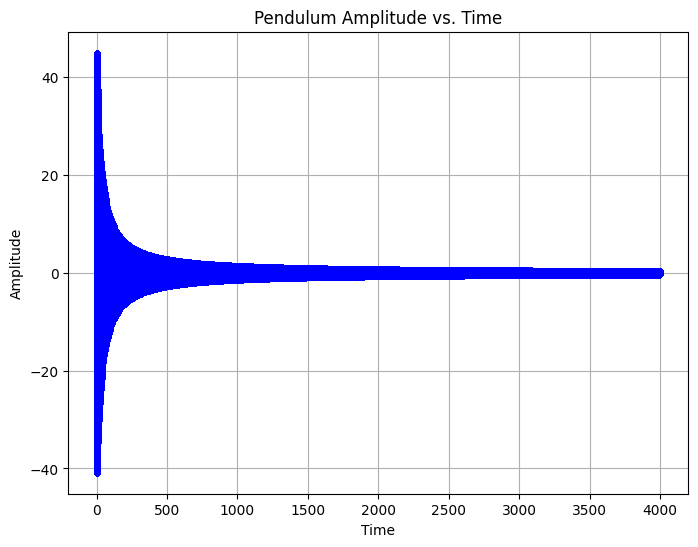

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t_plot, th_plot, marker='.', linestyle='', color='blue')
ax.set_title('Pendulum Amplitude vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.grid(True)

plt.show()


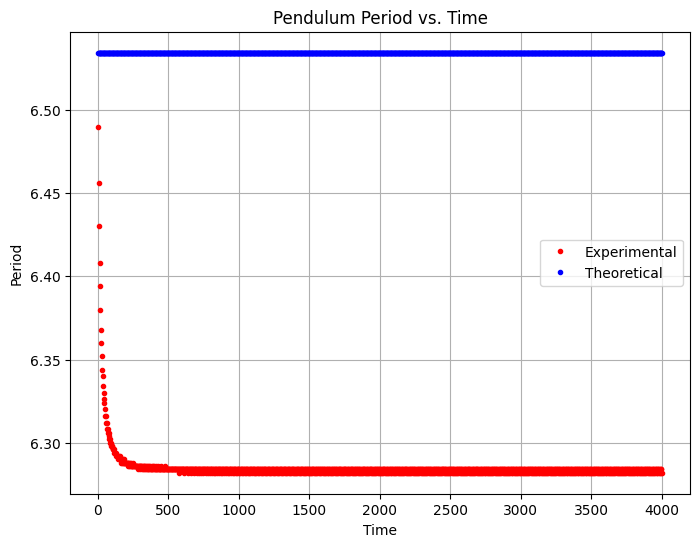

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(trev, period, marker='.', linestyle='', color='red', label='Experimental')
ax.plot(trev, period_theory, marker='.', linestyle='', color='blue', label='Theoretical')
ax.set_title('Pendulum Period vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Period')
ax.legend()
ax.grid(True)

plt.show()

In [34]:
AvePeriod = 0.0
ErrorBar = 0.0
for i in range(1,nPeriod+1):
    AvePeriod = AvePeriod + period[i-1]
AvePeriod = AvePeriod/nPeriod
for i in range(1,nPeriod+1):
    ErrorBar = ErrorBar + (period[i-1]-AvePeriod)*(period[i-1]-AvePeriod)
ErrorBar = math.sqrt(ErrorBar/(nPeriod*(nPeriod-1)))
print("Average Period = %f +/- %f" % (AvePeriod,ErrorBar))
    

Average Period = 6.285035 +/- 0.000328


In [35]:
t0=theta0*Pi/180.0
t_infinite = 2.0*Pi/math.sqrt(g_over_L)*(1.0+t0*t0/16.0+math.pow(t0,4)*11.0/3072.0+math.pow(t0,6)*173.0/737280.0)
error_infinite = 2.0*Pi/math.sqrt(g_over_L)*math.pow(t0,8)*22931.0/1321205760.0

In [36]:
print("Infinite series prediction = %f +/- %f" % (t_infinite,error_infinite))

Infinite series prediction = 6.534329 +/- 0.000016


In [37]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')
npoints = 2
x.append(1)
x.append(2)
ex.append(0)
ex.append(0)
y.append(AvePeriod)
y.append(t_infinite)
ey.append(ErrorBar)
ey.append(error_infinite)

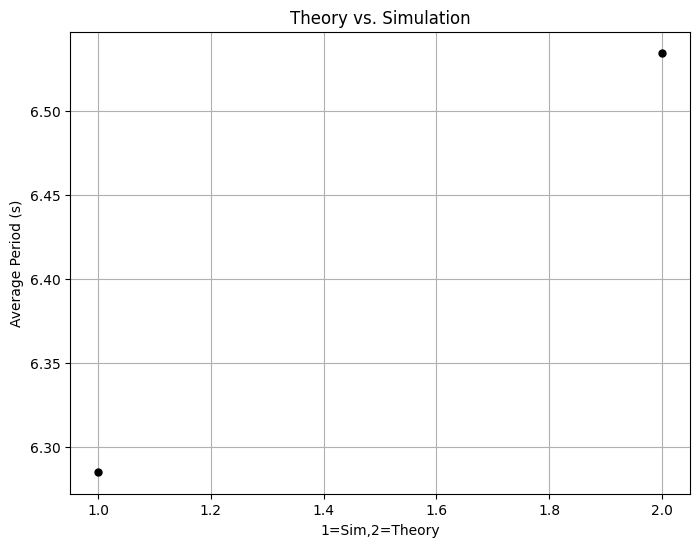

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(x, y, yerr=ey, xerr=ex, fmt='o', markersize=5, color='black')
ax.set_title('Theory vs. Simulation')
ax.set_xlabel('1=Sim,2=Theory')
ax.set_ylabel('Average Period (s)')
ax.grid(True)

plt.show()